In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet import Prophet

In [2]:
filename = ('/content/drive/MyDrive/CodingDojo/CodingDojo_Part3/Week 1/EOD-PFE.csv')
df = pd.read_csv(filename)
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,36.360,36.53,36.25,36.37,6583100.0,0.0,1.0,30.492734,30.635301,30.400484,30.501120,6583100.0
1,2017-12-27,36.310,36.46,36.23,36.33,8319672.0,0.0,1.0,30.450802,30.576597,30.383711,30.467575,8319672.0
2,2017-12-26,36.090,36.27,35.95,36.21,10892371.0,0.0,1.0,30.266302,30.417257,30.148894,30.366938,10892371.0
3,2017-12-22,36.260,36.38,36.05,36.14,8598998.0,0.0,1.0,30.408870,30.509506,30.232757,30.308234,8598998.0
4,2017-12-21,36.585,36.60,36.19,36.24,14742620.0,0.0,1.0,30.681426,30.694006,30.350166,30.392097,14742620.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   float64
 6   Dividend    1090 non-null   float64
 7   Split       1090 non-null   float64
 8   Adj_Open    1090 non-null   float64
 9   Adj_High    1090 non-null   float64
 10  Adj_Low     1090 non-null   float64
 11  Adj_Close   1090 non-null   float64
 12  Adj_Volume  1090 non-null   float64
dtypes: float64(12), object(1)
memory usage: 110.8+ KB


In [4]:
df.shape

(1090, 13)

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,32.525915,32.762496,32.283939,32.526532,2.633704e+07,0.004477,1.0,25.293804,25.477134,25.106294,25.294480,2.633704e+07
std,2.147734,2.150970,2.161098,2.159424,1.472893e+07,0.035718,0.0,2.516028,2.520140,2.520443,2.524062,1.472893e+07
min,27.810000,27.970000,27.510000,27.700000,6.397307e+06,0.000000,1.0,20.318957,20.441490,20.081097,20.189215,6.397307e+06
25%,30.780000,31.032500,30.520000,30.712500,1.836838e+07,0.000000,1.0,23.078464,23.261962,22.898993,23.053374,1.836838e+07
50%,32.660000,32.900000,32.380000,32.650000,2.363718e+07,0.000000,1.0,25.779051,25.935757,25.525171,25.757361,2.363718e+07
75%,34.167500,34.430000,33.980000,34.187500,3.056132e+07,0.000000,1.0,27.206844,27.381910,27.027917,27.262360,3.056132e+07
max,37.170000,37.390000,37.060000,37.310000,2.844623e+08,0.320000,1.0,31.172027,31.322981,31.079777,31.197186,2.844623e+08


In [6]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [7]:
#the column ['split'] is all 1's. Since this shouldn't effect the model at all, I've decided to drop it for the analysis.
df.drop(columns='Split', inplace=True)

In [8]:
#rename columns for model
df = df.rename(columns = {"Date":"ds", "Adj_Close":"y"})
df.head()

,ds,Open,High,Low,Close,Volume,Dividend,Adj_Open,Adj_High,Adj_Low,y,Adj_Volume
0,2017-12-28,36.360,36.53,36.25,36.37,6583100.0,0.0,30.492734,30.635301,30.400484,30.501120,6583100.0
1,2017-12-27,36.310,36.46,36.23,36.33,8319672.0,0.0,30.450802,30.576597,30.383711,30.467575,8319672.0
2,2017-12-26,36.090,36.27,35.95,36.21,10892371.0,0.0,30.266302,30.417257,30.148894,30.366938,10892371.0
3,2017-12-22,36.260,36.38,36.05,36.14,8598998.0,0.0,30.408870,30.509506,30.232757,30.308234,8598998.0
4,2017-12-21,36.585,36.60,36.19,36.24,14742620.0,0.0,30.681426,30.694006,30.350166,30.392097,14742620.0


In [9]:
df.dtypes

ds             object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Dividend      float64
Adj_Open      float64
Adj_High      float64
Adj_Low       float64
y             float64
Adj_Volume    float64
dtype: object

In [10]:
df.head()

,ds,Open,High,Low,Close,Volume,Dividend,Adj_Open,Adj_High,Adj_Low,y,Adj_Volume
0,2017-12-28,36.360,36.53,36.25,36.37,6583100.0,0.0,30.492734,30.635301,30.400484,30.501120,6583100.0
1,2017-12-27,36.310,36.46,36.23,36.33,8319672.0,0.0,30.450802,30.576597,30.383711,30.467575,8319672.0
2,2017-12-26,36.090,36.27,35.95,36.21,10892371.0,0.0,30.266302,30.417257,30.148894,30.366938,10892371.0
3,2017-12-22,36.260,36.38,36.05,36.14,8598998.0,0.0,30.408870,30.509506,30.232757,30.308234,8598998.0
4,2017-12-21,36.585,36.60,36.19,36.24,14742620.0,0.0,30.681426,30.694006,30.350166,30.392097,14742620.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



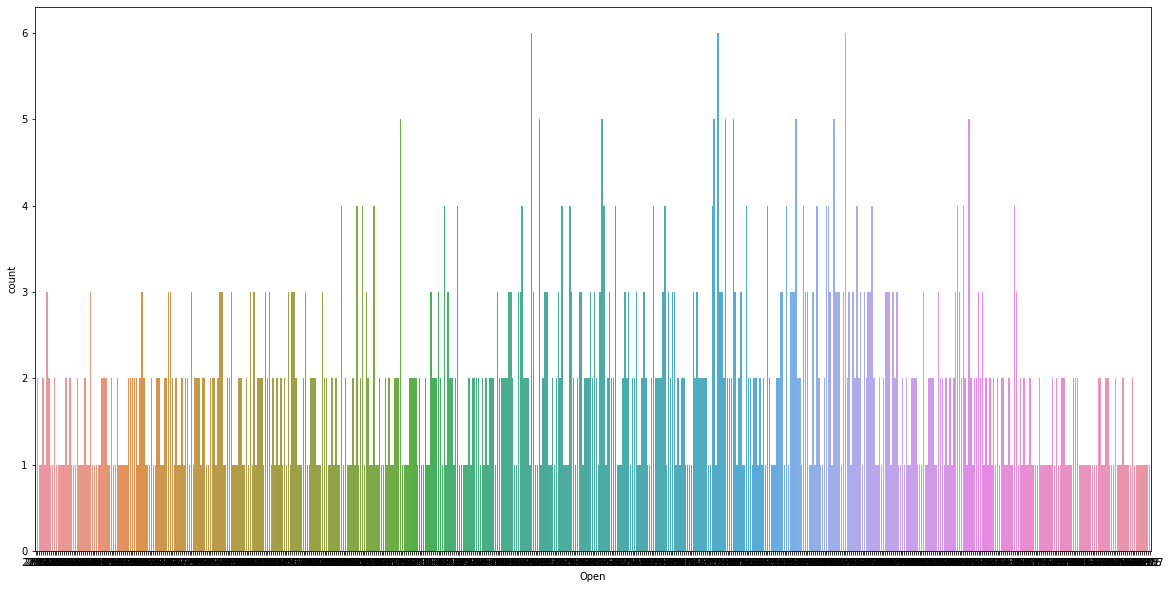

In [11]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize = (20, 10))
sns.countplot(df['Open']);

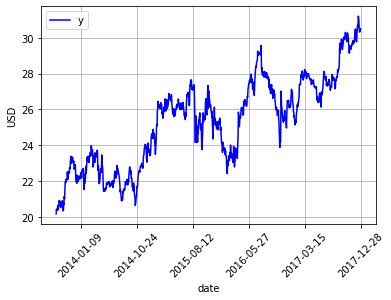

In [12]:
ax = df.plot(x='ds', y='y', style='b-', grid=True)
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.xticks(rotation = 45)
ax.set_xlabel("date");
ax.set_ylabel("USD");

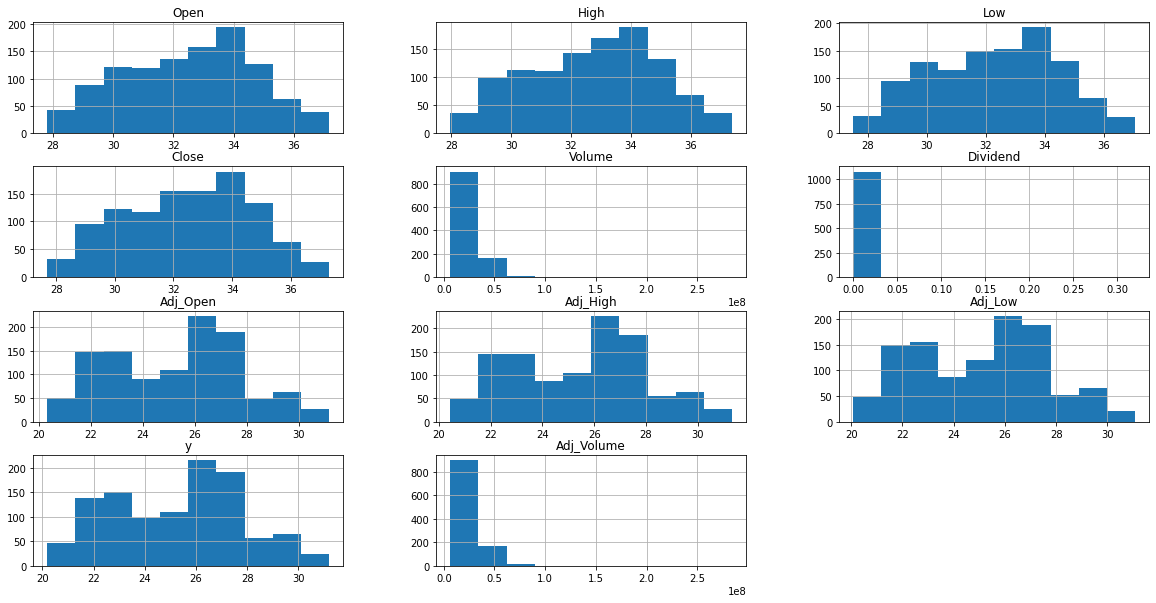

In [13]:
df.hist(figsize = (20, 10))
plt.show()

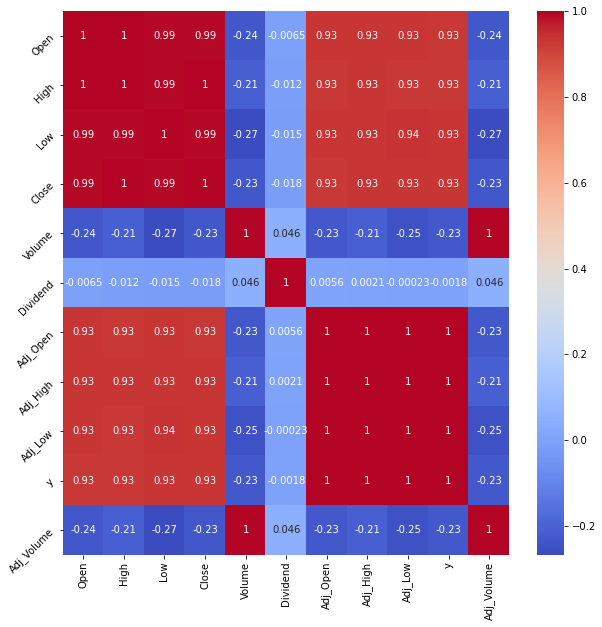

In [14]:
#as expected, since it is a stock price, all of these variables correlate to the target
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap= 'coolwarm');
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right');

In [15]:
#There is roughly 4.25 years of data so I've decided to select 2 years of the data for the training set and  amount portion to train and to test
train_size = 252*2    #using 2 years of data for training set - there are about 252 days of trading per year
val_size = 252        #1 year of data for validation set
train_val_size = train_size + val_size    #Size of training+validation
i = train_val_size    #Predict for day i, for the next h-1 days
H = 21                #Forecast Horizon
df_model = df[['ds', 'y']]

In [16]:
#using facebooks library called prophet for the timeseries model. We will add U.S Holidays to the parameters and use the values we previously
#defined to fit the model.
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(df_model[i-train_val_size:i])

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


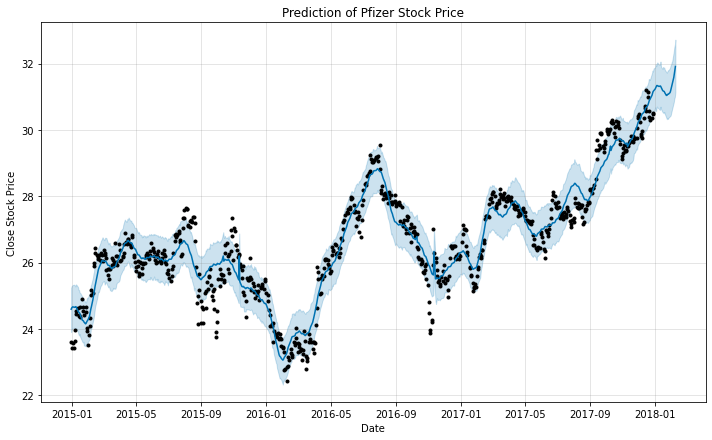

In [17]:
future = m.make_future_dataframe(periods=2*H)
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4] #eliminate weekeneds (2 weekends in future forecast)
prediction = m.predict(future)

m.plot(prediction)
plt.title("Prediction of Pfizer Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

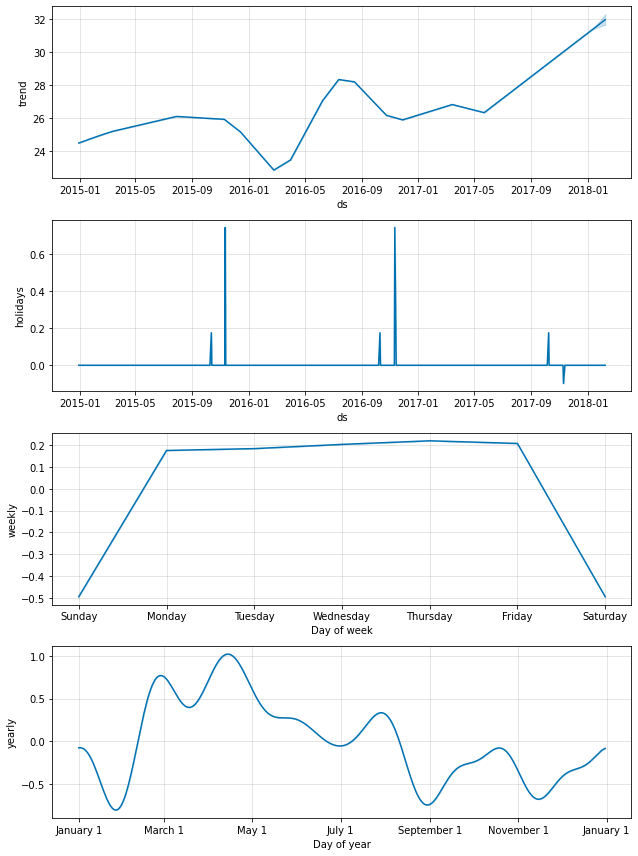

In [18]:
#this plot chart shows the 
m.plot_components(prediction)
plt.show()

In [19]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (Observed),Independence Day (Observed)_lower,Independence Day (Observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (Observed),Veterans Day (Observed)_lower,Veterans Day (Observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-30,24.506407,23.905269,25.241518,24.506407,24.506407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088660,0.088660,0.088660,0.0,0.0,0.0,0.183478,0.183478,0.183478,-0.094818,-0.094818,-0.094818,0.0,0.0,0.0,24.595067
1,2014-12-31,24.516595,23.983772,25.293731,24.516595,24.516595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117430,0.117430,0.117430,0.0,0.0,0.0,0.202839,0.202839,0.202839,-0.085409,-0.085409,-0.085409,0.0,0.0,0.0,24.634025
2,2015-01-02,24.536971,24.031531,25.326928,24.536971,24.536971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131208,0.131208,0.131208,0.0,0.0,0.0,0.207083,0.207083,0.207083,-0.075875,-0.075875,-0.075875,0.0,0.0,0.0,24.668179
3,2015-01-05,24.567535,24.036226,25.335197,24.567535,24.567535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084545,0.084545,0.084545,0.0,0.0,0.0,0.174999,0.174999,0.174999,-0.090454,-0.090454,-0.090454,0.0,0.0,0.0,24.652080
4,2015-01-06,24.577723,24.003252,25.304890,24.577723,24.577723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079393,0.079393,0.079393,0.0,0.0,0.0,0.183478,0.183478,0.183478,-0.104085,-0.104085,-0.104085,0.0,0.0,0.0,24.657117


In [20]:
# Initial training period.
initial= 2*252
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 252
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 21
horizon=str(horizon)+' days'

df_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)
# Performance Metrics of fb_cv
performance_metrics(df_cv)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-07-21 00:00:00 and 2017-12-07 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,0.384799,0.620322,0.594585,0.020539,0.022642,0.416667
1,5 days,0.442134,0.664932,0.579477,0.020118,0.017811,0.333333
2,6 days,0.598291,0.773493,0.657682,0.022927,0.028477,0.333333
3,7 days,0.904540,0.951073,0.846359,0.029491,0.035610,0.333333
4,8 days,0.949004,0.974168,0.877699,0.030516,0.025427,0.333333
5,11 days,1.009708,1.004842,0.863197,0.030114,0.038724,0.333333
6,12 days,1.817441,1.348125,1.119182,0.039382,0.046744,0.333333
7,13 days,3.049666,1.746329,1.524936,0.053906,0.058429,0.333333
8,14 days,3.799241,1.949164,1.766079,0.062490,0.045805,0.083333
9,15 days,3.888734,1.971987,1.794315,0.062875,0.047826,0.000000


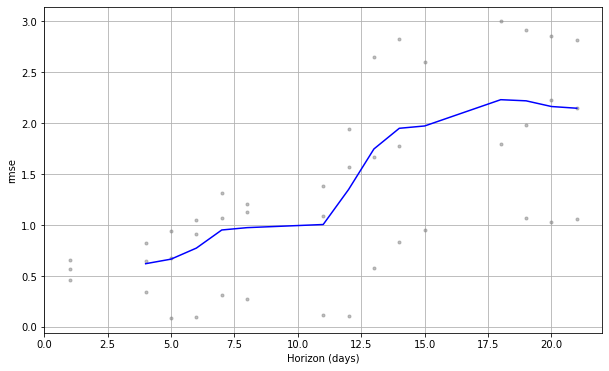

In [21]:
plot_cross_validation_metric(df_cv,'rmse');

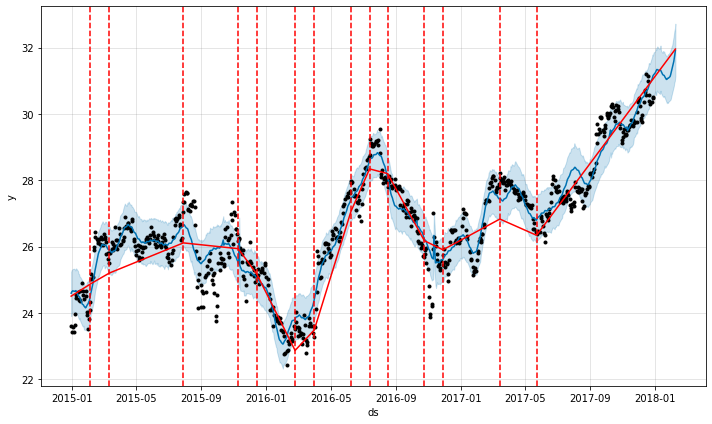

In [22]:
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(prediction)
a=add_changepoints_to_plot(fig.gca(),m,prediction)